In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

# Created by Diana Janik and Jan Markiewicz

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_multi.npy')

In [4]:
xs = data[:,:15]
ys = data[:,16]

In [5]:
print(xs)
print(ys)

[[-0.6841982  -0.8948207   0.03701912 ...  0.98127604  0.19312452
  -0.1692659 ]
 [ 0.23999183  0.68241465 -0.1220012  ... -0.06593668  0.9289217
  -0.08652755]
 [-0.8464783   0.6318086  -0.35473686 ... -0.83735657 -0.23799177
   0.24183242]
 ...
 [ 0.8076471  -0.35567102 -0.42386112 ...  0.09108337  0.33838156
  -0.14389399]
 [ 0.55414003 -0.43211934  0.5852553  ... -0.59782    -0.56331265
   0.00632767]
 [-0.3725722  -0.56339103  0.52376145 ... -0.9424653  -0.28271276
  -0.17411432]]
[-0.5731767   0.23535113 -0.18751958 ...  0.24868634  0.1566766
  0.16595405]


In [6]:
print(xs.shape)

(60000, 15)


In [7]:
model = torch.nn.Sequential(torch.nn.Linear(15,1))

In [8]:
t_xs = torch.from_numpy(xs)
t_ys = torch.from_numpy(ys)
print()

In [9]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(100,len(xs)-100))

In [10]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [11]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.01)

In [12]:
loss_func = torch.nn.MSELoss()

In [19]:
%%time
err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
#     with torch.no_grad():
#         vpred  = model(valid_set[:][0])
#         vloss  = loss_func(vpred,valid_set[:][1])
#         err_valid.append(vloss)
#         pred  = model(train_set[:][0])
#         loss  = loss_func(pred,train_set[:][1])
#         err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f " % (epoch, loss))   

epoch 0 0.319130 
epoch 1000 0.319130 
epoch 2000 0.319130 
epoch 3000 0.319130 
epoch 4000 0.319130 
epoch 5000 0.319130 
epoch 6000 0.319130 
epoch 7000 0.319130 
epoch 8000 0.319130 
epoch 9000 0.319130 
CPU times: user 8.79 s, sys: 131 ms, total: 8.92 s
Wall time: 8.88 s


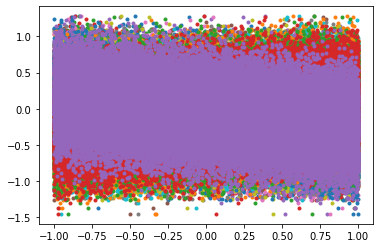

In [14]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

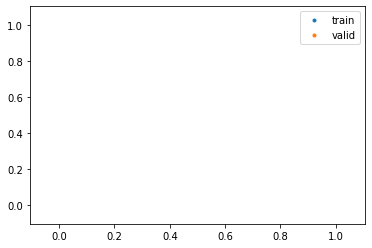

In [15]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

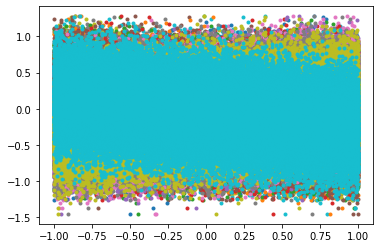

In [16]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [17]:
torch.save(model, "model.pt")

/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
